# <h2 align=center> **EDA ML-OPS** </h2>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings

# Suprimir todos los warnings
warnings.filterwarnings("ignore")

#Cargar los Dataframe desde los archivos parquet
df_reviews = pd.read_parquet('./0 Dataset/user_review_LISTO.parquet')
df_games =   pd.read_parquet('./0 Dataset/steam_games_LISTO.parquet')
df_items =   pd.read_parquet('./0 Dataset/user_items_LISTO.parquet')

FileNotFoundError: [Errno 2] No such file or directory: './0 Dataset/user_review_LISTO.parquet'

# 3_ **`australian_user_reviews`**

**Las columnas de este dataset son:**    
  * 🆔 **user_id**: El identificador único del usuario.
  * 🔗 **user_url**: El enlace al perfil del usuario.
  * 📰 **reviews**: El enlace a las reseñas del usuario.


In [46]:
# 1. Tipos de Variables
tipos_variables_df_reviews = df_reviews.dtypes
print("Tipos de Variables en df_reviews:")
print(tipos_variables_df_reviews)

# 2. Descripción Estadística
descripcion_estadistica_reviews = df_reviews.describe()
print("\nDescripción Estadística de df_reviews:")
print(descripcion_estadistica_reviews)


Tipos de Variables en df_reviews:
user_id              object
user_url             object
reviews_posted        int64
reviews_item_id       int64
reviews_helpful      object
reviews_recommend      bool
reviews_review       object
dtype: object

Descripción Estadística de df_reviews:
       reviews_posted  reviews_item_id
count    47626.000000     47626.000000
mean      2014.149351    155200.893294
std          0.841130    124600.139971
min       2010.000000        10.000000
25%       2014.000000      6060.000000
50%       2014.000000    209080.000000
75%       2015.000000    247940.000000
max       2015.000000    428880.000000


**Medidas de Variabilidad:**

Calcularemos medidas de variabilidad para la variable numérica reviews_posted, como la varianza y la desviación estándar.

In [47]:
# 3. Medidas de Variabilidad
variance_reviews_posted = df_reviews['reviews_posted'].var()
std_dev_reviews_posted = df_reviews['reviews_posted'].std()

# Mostrar los resultados
print(f'Varianza de reviews_posted: {variance_reviews_posted}')
print(f'Desviación Estándar de reviews_posted: {std_dev_reviews_posted}')


Varianza de reviews_posted: 0.7074995265494385
Desviación Estándar de reviews_posted: 0.8411299106258429


## Histogramas

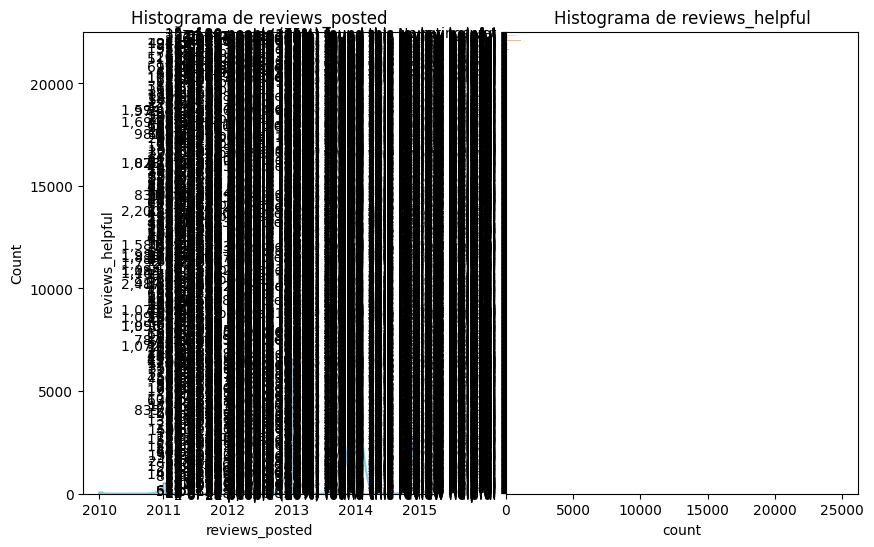

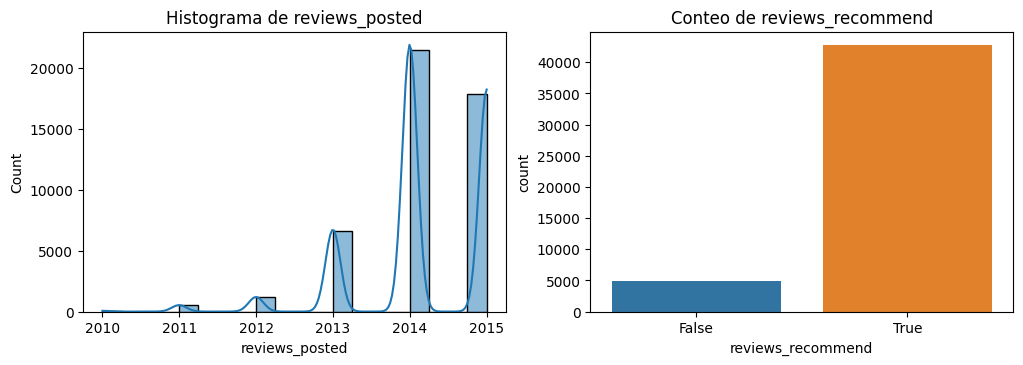

In [48]:
# 4. Histogramas
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_reviews['reviews_posted'], kde=True, color='skyblue')
plt.title('Histograma de reviews_posted')

plt.subplot(1, 2, 2)
sns.countplot(y='reviews_helpful', data=df_reviews, palette='pastel')
plt.title('Histograma de reviews_helpful')

plt.show()

# 4. Histogramas
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(df_reviews['reviews_posted'], bins=20, kde=True)
plt.title('Histograma de reviews_posted')

plt.subplot(2, 2, 2)
sns.countplot(x='reviews_recommend', data=df_reviews)
plt.title('Conteo de reviews_recommend')

plt.show()



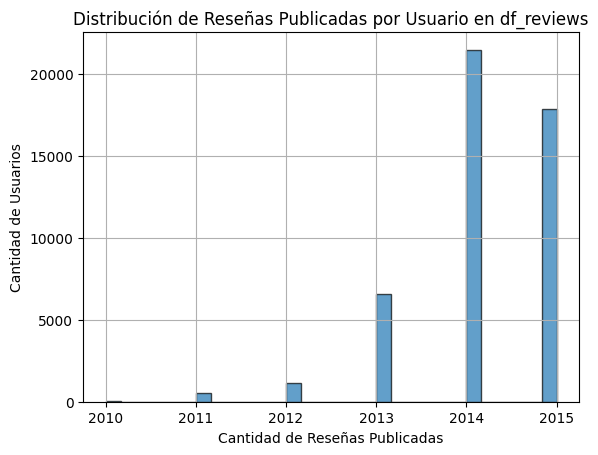

In [49]:
# 18. Histograma de Reseñas Publicadas por Usuario en df_reviews
df_reviews['reviews_posted'].hist(bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Cantidad de Reseñas Publicadas')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución de Reseñas Publicadas por Usuario en df_reviews')
plt.show()


## Medidas de variabilidad

In [50]:
# 3. Medidas de Variabilidad
var_reviews_posted = df_reviews['reviews_posted'].var()
print(f'Varianza de reviews_posted: {var_reviews_posted}')


Varianza de reviews_posted: 0.7074995265494385


In [51]:
# 4. Medidas de Variabilidad
variabilidad_df_reviews = df_reviews[['reviews_posted']].std()
print("\nMedidas de Variabilidad en df_reviews (reviews_posted):")
print(variabilidad_df_reviews)



Medidas de Variabilidad en df_reviews (reviews_posted):
reviews_posted    0.84113
dtype: float64


## Boxplot

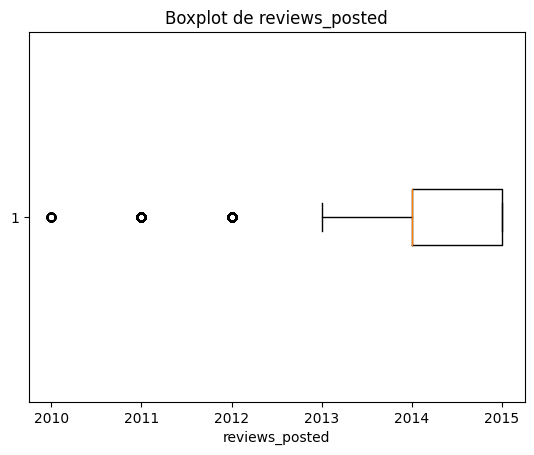

In [52]:

# 5. Boxplot
# Boxplot para reviews_posted
plt.boxplot(df_reviews['reviews_posted'], vert=False)
plt.title('Boxplot de reviews_posted')
plt.xlabel('reviews_posted')
plt.show()


## Análisis Multivariado y de Correlación:

Siguiendo un enfoque similar al utilizado en df_items, realizaremos un análisis multivariado y de correlación en df_reviews.

C:\Users\El Bauto\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


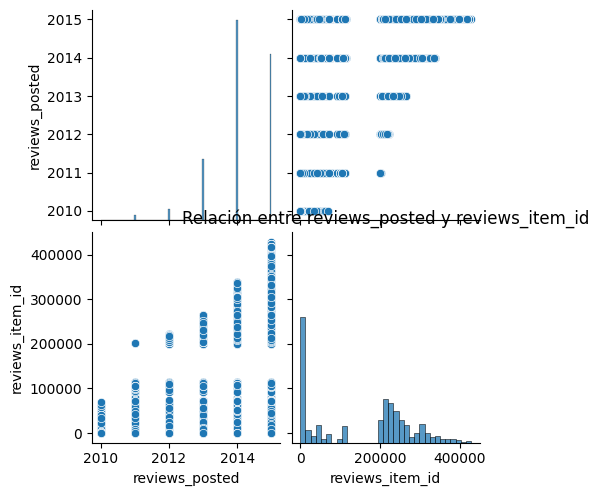

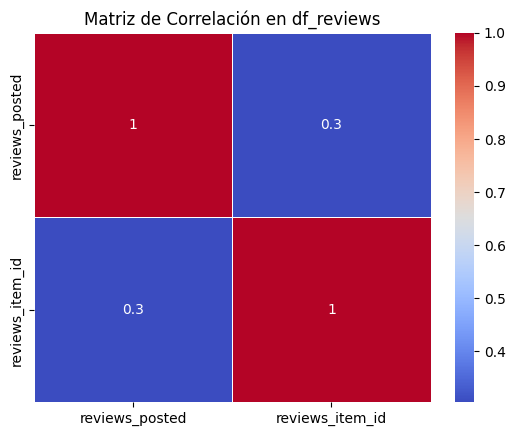

In [53]:
# 8. Análisis Multivariado y de Correlación en df_reviews
sns.pairplot(df_reviews[['reviews_posted', 'reviews_item_id']])
plt.title('Relación entre reviews_posted y reviews_item_id')
plt.show()

correlation_matrix_reviews = df_reviews[['reviews_posted', 'reviews_item_id']].corr()
sns.heatmap(correlation_matrix_reviews, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matriz de Correlación en df_reviews')
plt.show()


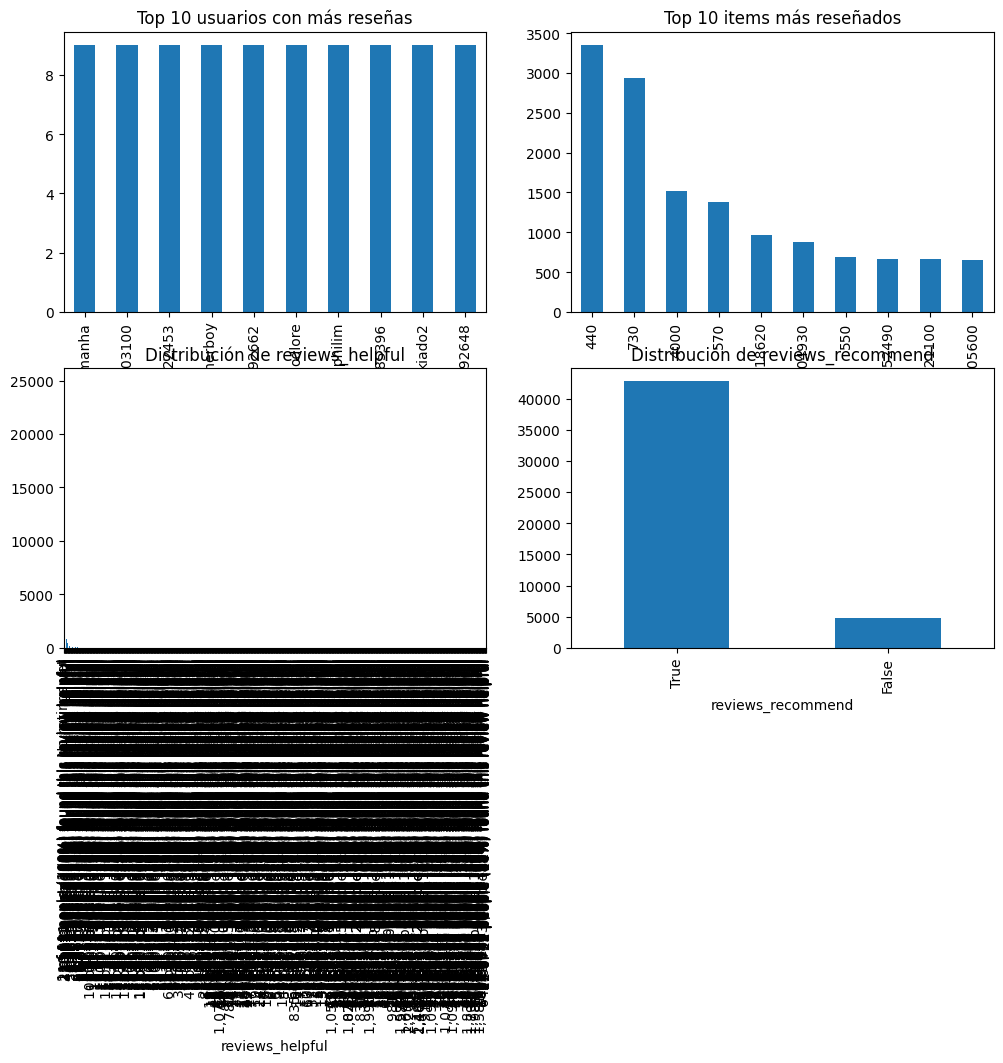

In [54]:
# 8. Análisis de las Variables Categóricas en df_reviews
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
df_reviews['user_id'].value_counts().head(10).plot(kind='bar', ax=axes[0, 0], title='Top 10 usuarios con más reseñas')
df_reviews['reviews_item_id'].value_counts().head(10).plot(kind='bar', ax=axes[0, 1], title='Top 10 items más reseñados')
df_reviews['reviews_helpful'].value_counts().plot(kind='bar', ax=axes[1, 0], title='Distribución de reviews_helpful')
df_reviews['reviews_recommend'].value_counts().plot(kind='bar', ax=axes[1, 1], title='Distribución de reviews_recommend')
plt.show()


Análisis de Variables Textuales:
Para la variable reviews_review, que contiene las reseñas de los usuarios, podemos realizar un análisis de texto para obtener información sobre las opiniones.

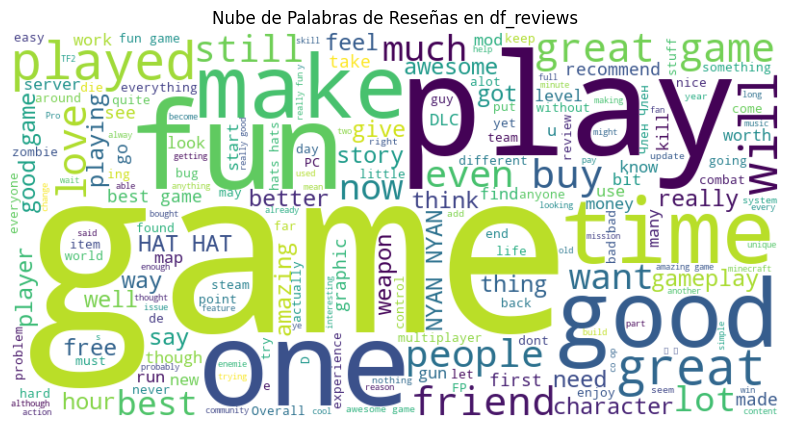

In [55]:
# 16. Análisis de Variables Textuales en df_reviews
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_reviews = ' '.join(df_reviews['reviews_review'].dropna())
reviews_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_reviews)

plt.figure(figsize=(10, 5))
plt.imshow(reviews_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de Reseñas en df_reviews')
plt.show()


Distribución de Reseñas Recomendadas:
Visualizaremos la distribución de reseñas recomendadas.

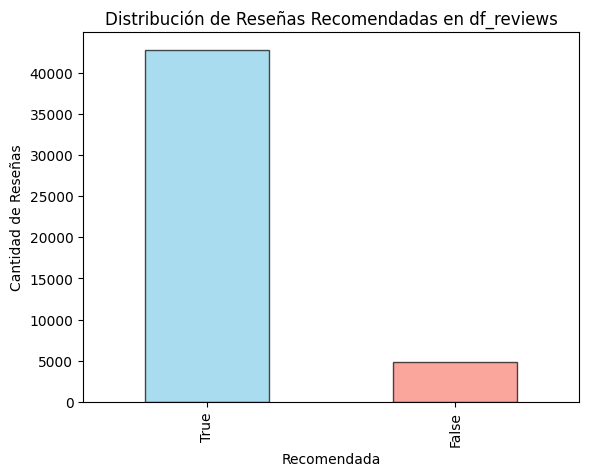

In [56]:
# 17. Distribución de Reseñas Recomendadas en df_reviews
df_reviews['reviews_recommend'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='k', alpha=0.7)
plt.xlabel('Recomendada')
plt.ylabel('Cantidad de Reseñas')
plt.title('Distribución de Reseñas Recomendadas en df_reviews')
plt.show()


# Conclusiones Finales:
A partir de todos los análisis realizados en los DataFrames df_items, df_games y df_reviews, generaremos conclusiones finales que resuman los patrones y relaciones identificadas.

Ejemplo: "En general, observamos una correlación débil entre el número de revisiones publicadas (reviews_posted) y la identificación del item de revisión (reviews_item_id) en el DataFrame df_reviews."

* Informe EDA en Notebook:

* El informe presenta un análisis profundo de todos los elementos clave y los criterios de decisión se encuentran explícitos. La selección de gráficas es pertinente y se apoya en las mismas para dicho análisis. Incluye lo básico esperado en un EDA:

* - chequeo de nulos
* - valores duplicados
* - valores faltantes
* - tipos de datos
* - análisis estadístico de datos
* - análisis de correlaciones bi y multivariado

* TIPOS DE VARIABLES
* DESCRIPCION ESTADISTICA 
* MEDIDAS DE VARIABILIDAD
* HISTORGRAMAS
* BOXPLOT
* ANALISIS MULTIVARIADO
* ANALISIS DE CORRELACION DE VARIABLES
* CONCLUSIONES

#### Creamos una funcion para revisar:
    - Tipos de datos
    - Chequeo de nulos

In [57]:
# Funcion
def data_type_check(df):
    # Crear un diccionario para almacenar el resumen de datos


    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100-porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(mi_dict)

    return df_info

In [58]:
#Invoco mi funcion
data_type_check(df_juegos)

NameError: name 'df_juegos' is not defined

In [ ]:
def check_duplicates(df):
    # Verificar si hay duplicados en el DataFrame
    duplicates = df.duplicated().sum()
    
    if duplicates > 0:
        print(f"Hay {duplicates} valores duplicados en el DataFrame.")
    else:
        print("No se encontraron valores duplicados en el DataFrame.")

In [ ]:
check_duplicates(df_juegos)

NameError: name 'check_duplicates' is not defined

1.3 Borramos todas las columnas que no vamos a usar 

In [ ]:
#Borramos title 
df_juegos.drop(['publisher', 'url', 'tags', 'specs', 'price', 'early_access', 'id','developer'], axis=1, inplace=True)

#### Identifico filas que presentan registros completamente vacíos y procedo a eliminarlas del conjunto de datos.

In [ ]:
df_juegos = df_juegos.dropna(how='all').reset_index(drop=True)

#Eliminamos campos totalmente duplicados en ID
df_juegos.drop_duplicates(subset='id', inplace=True)